# Gekoppelde tanks met zoutoplossing

Twee grote tanks, elk gevuld met 100 Liter vloeistof, zijn met pijpleidingen aan elkaar verbonden. De vloeistof stroomt van tank A in tank B met een snelheid van 3 L/min en van B in A met 1 L/min. Een zoutoplossing met een concentratie van 0.2 kg/L stroomt met een snelheid van 6 L/min tank A in. De oplossing stroomt met een snelheid van 4 L/min tank A uit en verlaat met een snelheid van 2 L/min tank B

Er wordt gebruik gemaakt van de 2 differentiaalvergelijkingen hieronder om de Forward Euler en de Heuns methode toe te passen: <br>
**zoutconcentratie in tank A  in kg**
Om de zoutconcentratie van tank A per minuut is de huidige aantal zout ( x )  + zoutconcentratie van 6L/min +zoutconcentratie van de 1L/min - zoutconcentratie van de 3L/min - zoutconcentratie van de 4L/min. De differentiaalvergelijking luidt als volgt:

$$ \frac{dx}{dt} = 1.2  +(\frac{1}{100} * (\frac{3}{100}(x + 1.2))+ y)) - (\frac{3}{100}(x + 1.2)) - (\frac{4}{100}(x+1.2)) $$<br>
**zoutconcentratie in tank A  in kg**
Om de zoutconcentratie van tank B per minuut is de huidige aantal zout ( y ) + de zouttconcentratie van 3L/min   die  binnenstroomt - de zoutconcentratie van de 1L/min - de zoutcontratie van 2L/min
$$ \frac{dy}{dt}  = (\frac{3}{100}(x+1.2)) - (\frac{1}{100} * (\frac{3}{100}(x +1.2)) + y)) - (\frac{2}{100}(y + (\frac{3}{100}(x +1.2)))$$

De uitgewerkte van de bovenstaande Differentiaal vergelijkingen voor de zoutconcentratie van tank A ( x ) en B (y) zijn: <br>
De differentiaal vergelijking voor tank A:
$$\frac{dx}{dt} = 0.01y - 0.0697x +1.11636$$
 
De differentiaalvergelijking van tank B: 
$$\frac{d
y}{dt} = -0.03y + 0.0291x + -0.03492 $$
Deze verggelijkingen wordt ebruikt voor de Backward EulerMethod.


In [1]:
# importeer benodigde libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact #  interactieve visualisatie

Er wordt vervolgens de volgende constanten gedefnieerd

In [2]:
totaltime = 200 # totale  tjdin minuten
Czout = 0.2   # zoutconcentratie  in kg/L

## Forward Euler

Er wordt eerst Forward Euler method toegepast.

In [3]:
def forwardeuler(h=1):
    xin = 6 *  Czout # Er wordt elke minuut 6L zoutoplossing van 0.2kg/L in  de tank toegevoegd. Dit is gelijk aan 6*0.2 = 1.2 k Zout
    t = h * np.array(range(totaltime+1)) # totale tijd in min
    x = np.zeros(totaltime+1) # zoutgehalte in kg van tank A
    y = np.zeros(totaltime+1) # zoutgehalte in kg van tank B 
    
    # aantal kg zout bij t=0
    x[0] = 0
    y[0] = 20
    
    for step in range(totaltime):
        # De differentiaal vergelijking wordt opesplits zodat er is meer overzichtelijkheid zit in de code.
        xovery = (3/100) * (x[step] + xin) # (3/100(x +1.2)
        yoverx = (1/100) * (y[step] + xovery) # 1/100 * ((3/100(x +1.2))+y)
        xuit   = (4/100) * (x[step]  + xin)  # 4/100(x+1.2)
        yuit   = (2/100) * (y[step] + xovery) # 2/100(y + (3/100(x +1.2)
        #Forward Euler method
        x[step+1] = x[step] + h * (xin + yoverx - xovery - xuit)
        y[step+1] = y[step] + h * (xovery - yoverx - yuit)
    return t,x,y

    

In [28]:
#Plot van de Forward Euler method
@interact
def plotFEM(h=1):
    t,tankA, tankB = forwardeuler(h)
    # plot tank A
    plt.plot(t, tankA/100, label="tank A")

    # plot tank B
    plt.plot(t, tankB/100, label="tank B")

    # zet de titel en de labels
    plt.title('Zoutconcentratie over tijd Forward Euler method')
    plt.ylabel("Zoutconcentratie in kg/L")
    plt.xlabel("Tijd in minuten")
    # show the plot
    plt.legend()
    plt.show()

interactive(children=(IntSlider(value=1, description='h', max=3, min=-1), Output()), _dom_classes=('widget-int…

## Heuns methode met adaptieve stapgrootte
Er wordt ook Heuns methode geimplementeerd om  nauwkeurige resultaten te krijgen.

In [13]:
def heuns(h=1):
    xin = 6 *  Czout # Er wordt elke minuut 6L zoutoplossing van 0.2kg/L in  de tank toegevoegd. Dit is gelijk aan 6*0.2 = 1.2 k Zout
    x = np.zeros(totaltime+1) # zoutgehalte in kg van ttank A
    y = np.zeros(totaltime+1) # zoutgehalte in kg van tank B 
    t = h * np.array(range(totaltime+1)) # totale tijd in min
    
    x[0] = 0
    y[0] = 20
    for step in range(totaltime):
        xovery = (3/100) * (x[step] + xin)
        yoverx = (1/100) * (y[step] + xovery)
        xuit   = (4/100) * (x[step]  + xin)
        yuit   = (2/100) * (y[step] + xovery)
        
        # Heun's methode 
        xe = x[step] + h * (xin + yoverx - xovery - xuit)
        ye = y[step] + h * (xovery - yoverx - yuit)
        
        xy3 = (3/100) * (xe + xin)
        yx3 = (1/100) * (ye + xy3)
        xu3 = (4/100) * (xe  + xin)
        yu3 = (2/100) * (ye + xy3)
        
        x[step+1] = x[step] + (h/2) *((xin + yoverx - xovery - xuit) + (xin + yx3 - xy3 -xu3))
        y[step+1] = y[step] + (h/2) *((xovery - yoverx - yuit) + (xy3 - yx3 - yu3))
    return t,x,y
    

# Plot 

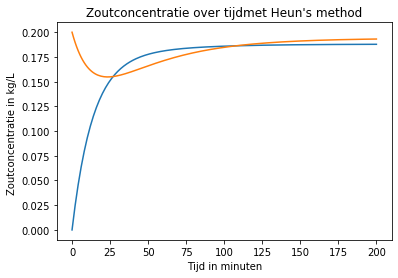

In [26]:
def plotHeuns(h):
    t,ah,bh = heuns(h)
    #plot  tank A
    plt.plot(t, ah/100, label= 'tank A')
    #plot tank B
    plt.plot(t, bh/100, label= 'tank B')

    # Zet de title en de labels
    plt.title('Zoutconcentratie over tijdmet Heun\'s method')
    plt.ylabel("Zoutconcentratie in kg/L ")
    plt.xlabel("Tijd in minuten")
    plt.show()
plotHeuns(1)    

## Backward Euler method

Er is well geen duidelijk instabliteit te zien in deze probleem , maar er is toch gekozen om de backward euler method te implementeren. <br>
Voor deze implementatie  iser gebruikt gemaakt van de uitgewerkte differentialverelijkingen: <br>
x'(t) = 0.01𝑦−0.0697𝑥+1.11636<br>
y'(t) = −0.03𝑦+0.0291𝑥+−0.03492



In [33]:
 def backwardeuler(h=1):
    t = h * np.array(range(totaltime+1)) # totale tijd in min
    x = np.zeros(totaltime+1) # zoutgehalte in kg van tank A
    y = np.zeros(totaltime+1) # zoutgehalte in kg van tank B
    
    x[0] = 0
    y[0] = 20
    
    for step in range(totaltime):
        x[step+1] = (x[step] + (0.01*h * y[step+1]) + (1.11636*h))/(1+ (0.0697*h))
        y[step+1] = (y[step] + (0.0291*h*x[step+1]) - (0.03492*h))/(1 + (0.03*h))
    return t,x,y

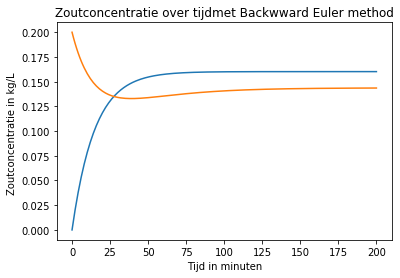

In [41]:
def plotBEM(h):
    t,abe,bbe = backwardeuler(1)
    # plot tank A en B in kg/L
    plt.plot(t, abe/100, label='Tank A')
    plt.plot(t, bbe/100, label= 'Tank B')
    
    # Zet de title en de labels
    plt.title('Zoutconcentratie over tijdmet Backwward Euler method')
    plt.ylabel("Zoutconcentratie in kg/L ")
    plt.xlabel("Tijd in minuten")
    plt.show()
    
plotBEM(1)

In [35]:
#Plot van de Backward Euler method
@interact
def plotBEM(h=5):
    t,tankA, tankB = backwardeuler(h)
    # plot  tank A
    plt.plot(t, tankA/100, label="tank A")

    # plot  tank B
    plt.plot(t, tankB/100, label="tank B")

    plt.title("Zoutconcentratie over een bepaalde tijd met Backward Euler")
    plt.xlabel("Tijd in minuten")
    plt.ylabel("Zoutconcentratie in kg/L")

    # show the plot
    plt.legend()
    plt.show()

interactive(children=(IntSlider(value=5, description='h', max=15, min=-5), Output()), _dom_classes=('widget-in…

Er is duidelijk een verschil te zien tussen de grafieken van de expliciete methoden  (Forward Euler method en Heun's method)en de Backward Euler method. Dit komt dat er een klein foutje zit in de uitgewerkte differentiaalvergelijking.
De zoutconcentratie zal uiteindelijk relatief gelijk zijn of hebben ze een heel kleine afwijking. Dit is te zien in de expliciete methoden ( Forward Euler method  en Heun's method)